2019-01-31: Parse genes from figure 1 into list for annotation... Among other things
=============

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import seaborn as sn
log10_FC = np.log10(1/4)

##### Lets first concat both Prop and Ketamine results

In [2]:
deseq_prop = pd.read_csv("experiments/2018-12-09_DESeq/2018_12_09_Result_DESeq-Prop.csv", index_col=0)
deseq_ket = pd.read_csv("experiments/2018-12-09_DESeq/2018_12_09_Result_DESeq-Ket.csv", index_col=0)

## rename columns
deseq_ket = deseq_ket.rename(columns={"log2FoldChange": "Ketamine log2FC", "padj":"Ketamine padj", "stat":"Ketamine stat"})
deseq_prop = deseq_prop.rename(columns={"log2FoldChange": "Propofol log2FC", "padj":"Propofol padj", "stat":"Propofol stat"})

deseq_prop = deseq_prop.drop(['baseMean', 'lfcSE','pvalue'], axis=1)
deseq_ket = deseq_ket.drop(['lfcSE','pvalue'], axis=1)

deseq_prop['Propofol log10FC'] = np.log10(2**deseq_prop['Propofol log2FC'])
deseq_ket['Ketamine log10FC'] = np.log10(2**deseq_ket['Ketamine log2FC'])

df = pd.concat([deseq_ket,deseq_prop], axis=1)
df.head()

,baseMean,Ketamine log2FC,Ketamine stat,Ketamine padj,Ketamine log10FC,Propofol log2FC,Propofol stat,Propofol padj,Propofol log10FC
VK055_0001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VK055_0002,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VK055_0003,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VK055_0004,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VK055_0005,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Get a gene_id index 
summary_df = pd.read_csv("2019-01-31_E1004_renamed.txt", sep='\t')
gene_df = summary_df.set_index("Synonym").iloc[:,6:8]
#df = pd.concat([gene_df, df], axis=1)
#df.head()

In [22]:
#df.to_csv("2019-01-31_deseq_table_results.txt", sep='\t')

In [41]:
### Now we can select genes in this table
only_ket = df[ (df['Ketamine log10FC'] < log10_FC) & (df['Ketamine padj'] < 0.05) 
             & (df['Propofol padj'] > 0.05)] 
only_prop = df[ (df['Propofol log10FC'] < log10_FC) & (df['Propofol padj'] < 0.05) 
             & (df['Ketamine padj'] > 0.05)] 

both_df = df[ (df['Ketamine log10FC'] < log10_FC) & (df['Ketamine padj'] < 0.05) 
            & (df['Propofol log10FC'] < log10_FC) & (df['Propofol padj'] < 0.05) ]


# Check length of rows (# of genes) match venn diagram
print(f"Ketamine only: {len(only_ket)}")
print(f"Propofol only: {len(only_prop)}")
print(f"Both: {len(both_df)}")

with open("only_ket.txt", 'w') as f:
    for gene in only_ket.iloc[:,0]:
        f.write(gene + '\n')

Ketamine only: 68
Propofol only: 55
Both: 115


### Parse for mark requirement


In [ ]:
def _plot_scatter():
        # Plotting scatter
        scatter_plot.scatter(
            x="Propofol log10FC",
            y="Ketamine log10FC",
            data=self.main_df[
                (self.main_df["Propofol padj"] < self.PVALUE)
                & (self.main_df["Propofol log10FC"] < self.LOG10_FC)
                & (self.main_df["Ketamine padj"] < self.PVALUE)
                & (self.main_df["Ket log10FC"] < self.LOG10_FC)
            ],
            c="#e69f00",
            s=self.marker_size,
            edgecolors="black",
            linewidths=self.marker_lw,
        )
        # Only Ketamine
        self.scatter.scatter(
            x="Prop log10FC",
            y="Ket log10FC",
            data=self.main_df[
                (self.main_df["Ket padj"] < self.PVALUE)
                & (self.main_df["Prop padj"] > self.PVALUE)
                & (self.main_df["Ket log10FC"] < self.LOG10_FC)
                & (
                    (self.main_df["Prop log10FC"] > self.LOG10_FC)
                    | (self.main_df["Prop log10FC"] < self.LOG10_FC)
                )
            ],
            c="#009e73",
            s=self.marker_size,
            edgecolors="black",
            linewidths=self.marker_lw,
        )
        # Only Propofol
        self.scatter.scatter(
            x="Prop log10FC",
            y="Ket log10FC",
            data=self.main_df[
                (self.main_df["Prop padj"] < self.PVALUE)
                & (self.main_df["Prop log10FC"] < self.LOG10_FC)
                & (self.main_df["Ket padj"] > self.PVALUE)
                & (
                    (self.main_df["Ket log10FC"] < self.LOG10_FC)
                    | self.main_df["Ket log10FC"]
                    > self.LOG10_FC
                )
            ],
            c="#0072b2",
            s=self.marker_size,
            edgecolors="black",
            linewidths=self.marker_lw,
            zorder=3,
        )


115
68
55


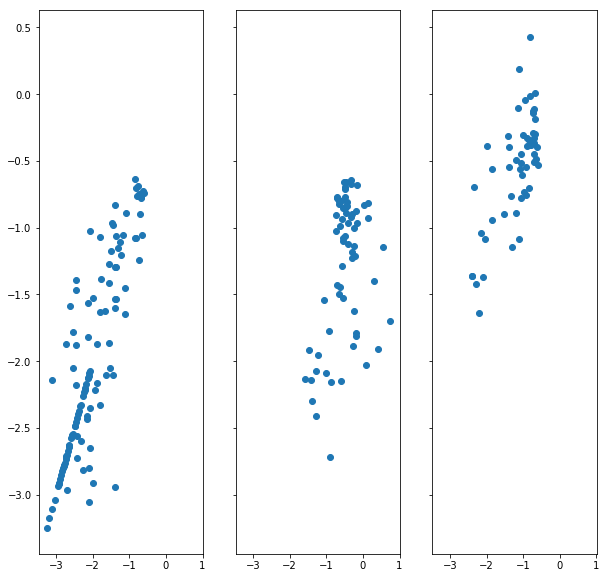

In [22]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, sharex=True, sharey=True)
fig.set_size_inches(10,10)
both_df = df[
                (df["Propofol padj"] < 0.05)
                & (df["Propofol log10FC"] < log10_FC)
                & (df["Ketamine padj"] < 0.05)
                & (df["Ketamine log10FC"] <log10_FC)
            ]
both_df = pd.concat([both_df, summary_df.set_index("Synonym").iloc[:,10:]], axis=1, join='inner')
ax1.scatter(x='Propofol log10FC', y='Ketamine log10FC', data=scatter_df)
print(len(both_df))

only_ket = df[
                (df["Ketamine padj"] < 0.05)
                & (df["Propofol padj"] > 0.05)
                & (df["Ketamine log10FC"] < log10_FC)
                & (
                    (df["Propofol log10FC"] > log10_FC)
                    | (df["Propofol log10FC"] < log10_FC)
                )
            ]
only_ket = pd.concat([only_ket, summary_df.set_index("Synonym").iloc[:,10:]], axis=1, join='inner')
ax2.scatter(x='Propofol log10FC', y='Ketamine log10FC', data=only_ket)
print(len(only_ket))

only_prop = df[
                (df["Propofol padj"] < 0.05)
                & (df["Ketamine padj"] > 0.05)
                & (df["Propofol log10FC"] < log10_FC)
                & (
                    (df["Ketamine log10FC"] > log10_FC)
                    | (df["Ketamine log10FC"] < log10_FC)
                )
            ]
only_prop = pd.concat([only_prop,summary_df.set_index("Synonym").iloc[:,10:]], axis=1, join='inner')
ax3.scatter(x='Propofol log10FC', y='Ketamine log10FC', data=only_prop)
print(len(only_prop))

In [23]:
only_ket.to_csv("Mark_Meeting_collab/2019-02-01_ketamine_genes.csv", sep='\t')
only_prop.to_csv("Mark_Meeting_collab/2019-02-01_propofol_genes.csv", sep='\t')
both_df.to_csv("Mark_Meeting_collab/2019-02-01_both_genes.csv", sep='\t')

In [ ]:
### Making volcano with previous genes
"""
fig, (prop_vol,ket_vol) = plt.subplots(ncols=2)
fig.set_size_inches(12,10)

def _set_volcano():
    for ax in fig.get_axes():
        ax.set(ylim=(1.0, 10 ** -8), xlim=(-3, 3), yscale="log")
        ax.set(ylim=(1.0, 10 ** -8), xlim=(-3, 3), yscale="log")

        # Vertical and Horizontal lines
        ax.axhline(
            0.05, color="black", linewidth=1.12, linestyle="solid", zorder=1
        )
        ax.axvline(
            np.log10(1/4), color="gray", linewidth=1, linestyle="solid", zorder=1
        )

        ax.axhline(
            0.05, color="black", linewidth=1.12, linestyle="solid", zorder=1
        )
        ax.axvline(
            np.log10(1/4), color="black", linewidth=1, linestyle="solid", zorder=1
        )

        # Set ticks
        ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
        ax.set_yticks([0.05])

        ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
        ax.set_yticks([0.05])
        
_set_volcano()

ket_vol.set(title="Ketamine/Xylazine", ylabel="Padj-Value", xlabel='Ketamine/Xylazine log10(Fold-Change)')
prop_vol.set(title="Propofol", ylabel="Padj-Value", xlabel='Propofol log10(Fold-Change)')

prop_vol.scatter(x='Propofol log10FC', y="Propofol padj", data=deseq_df, color='#C6C6C6')
prop_vol.scatter(x='Propofol log10FC', y="Propofol padj", data=previous_genes, color='red')


ket_vol.scatter(x='Ketamine log10FC', y="Ketamine padj", data=deseq_df, color='#C6C6C6')
ket_vol.scatter(x='Ketamine log10FC', y="Ketamine padj", data=previous_genes, color='red')

fig.savefig("2019-02-01_previous_genes_volcano.png")
"""

### 2019-02-02: Descriptive Statistics

### Quick correlation test


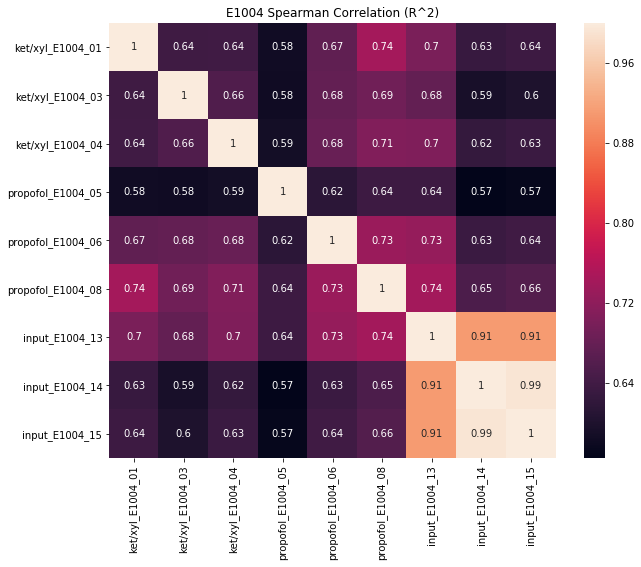

In [26]:
samples_df = summary_df.iloc[:,11:]
corr_df = (samples_df.corr("spearman"))**2
h = sn.heatmap(corr_df, annot=True)
h.set_title("E1004 Spearman Correlation (R^2)")
f = h.get_figure().set_size_inches(10,8)
h.get_figure().savefig("2019-01-31_E1004_spearman_heatmap.png", bbox_inches="tight")